# Analysis

In [38]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [43]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [4]:
import os
from src.constants import cmip6_ensemble_var

In [15]:
import xarray as xr

var="ts"
direc = cmip6_ensemble_var(var)
member_list = [x[len(var)+1:-6] for x in os.listdir(direc)]
file_list = [os.path.join(direc, x) for x in os.listdir(direc)]
da_list = []

for i, member in enumerate(member_list):
    ds = xr.load_dataset(file_list[i])
    if "member" not in ds.dims:
        print(i, member)
        ds = ds.expand_dims({"member": [member_list[i]]})
        ds.to_netcdf(file_list[i], mode="w")

# xr.merge(da_list)

0 AS-RCEC.TaiESM1.r1i1p1f1.80
1 BCC.BCC-CSM2-MR.r1i1p1f1.80
2 CAMS.CAMS-CSM1-0.r1i1p1f1.80
3 CAMS.CAMS-CSM1-0.r2i1p1f1.80
4 CAS.CAS-ESM2-0.r1i1p1f1.80
5 CAS.CAS-ESM2-0.r3i1p1f1.80
6 CAS.FGOALS-f3-L.r1i1p1f1.80
7 CAS.FGOALS-g3.r1i1p1f1.80
8 CAS.FGOALS-g3.r2i1p1f1.80
9 CAS.FGOALS-g3.r3i1p1f1.80
10 CAS.FGOALS-g3.r4i1p1f1.80
11 CCCR-IITM.IITM-ESM.r1i1p1f1.80
12 CMCC.CMCC-CM2-SR5.r1i1p1f1.80
13 CMCC.CMCC-ESM2.r1i1p1f1.80
14 E3SM-Project.E3SM-1-1.r1i1p1f1.80
15 FIO-QLNM.FIO-ESM-2-0.r1i1p1f1.80
16 FIO-QLNM.FIO-ESM-2-0.r2i1p1f1.80
17 FIO-QLNM.FIO-ESM-2-0.r3i1p1f1.80
18 INM.INM-CM4-8.r1i1p1f1.80
19 INM.INM-CM5-0.r1i1p1f1.80
20 KIOST.KIOST-ESM.r1i1p1f1.80
21 MOHC.HadGEM3-GC31-LL.r1i1p1f3.80
22 MOHC.HadGEM3-GC31-LL.r2i1p1f3.80
23 MOHC.HadGEM3-GC31-LL.r3i1p1f3.80
24 MOHC.HadGEM3-GC31-LL.r4i1p1f3.80
25 MOHC.HadGEM3-GC31-MM.r1i1p1f3.80
26 MOHC.HadGEM3-GC31-MM.r2i1p1f3.80
27 MOHC.HadGEM3-GC31-MM.r3i1p1f3.80
28 MOHC.HadGEM3-GC31-MM.r4i1p1f3.80
29 MOHC.UKESM1-0-LL.r1i1p1f2.80
30 MOHC.UKESM1-0-LL.r2i1p1

In [16]:
import xarray as xr
direc = cmip6_ensemble_var("ts")
member_list = [x[2:-3] for x in os.listdir(direc)]
file_list = [os.path.join(direc, x) for x in os.listdir(direc)]
xr.open_dataarray(file_list[0])

<xarray.DataArray 'ts' (member: 1, time: 960, y: 161, x: 361)>
[55796160 values with dtype=float32]
Coordinates:
  * member       (member) object 'AS-RCEC.TaiESM1.r1i1p1f1.80'
  * time         (time) datetime64[ns] 1948-01-15 1948-02-15 ... 2027-12-15
    lon          (x, y) float64 ...
    lat          (x, y) float64 ...
    member_id    object ...
  * x            (x) int64 0 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
  * y            (y) int64 -80 -79 -78 -77 -76 -75 -74 ... 74 75 76 77 78 79 80
    institution  object ...
    model        object ...
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        Temperature of the lower boundary of the atmosphere
    history:        2020-03-25T02:30:56Z altered by CMOR: Converted type from...
    long_name:      Surface Temperature
    original_name:  TS
    standard_name:  surface_temperature
    units:          K

In [6]:
xr.open_dataarray(file_list[0]).dims

('time', 'y', 'x')

In [26]:
from src.xr_utils import sel, can_coords, spatial_mean
nino34 = spatial_mean(sel(can_coords(xr.open_mfdataset(file_list)), reg="nino3.4")).compute() #.ts.plot.line(x="T")

warning, not changing:  member


In [33]:
nino34_60 = nino34.sel(T=slice("1958", "2017"))

In [53]:
from src.xr_utils import get_trend
mean60 = nino34_60.ts.mean("T")
trend60 = get_trend(nino34_60.ts, min_clim_f=False)

Text(0, 0.5, 'nino3.4 60 year trend [$^{\\circ}$C]')

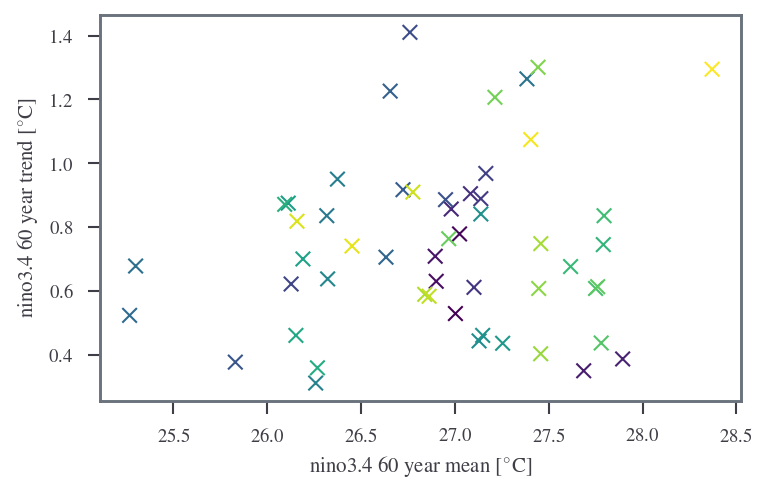

In [54]:
import matplotlib.pyplot as plt

plt.scatter(mean60.values - 273.15, trend60.values, c=[x for x in range(len(trend60.values))])
plt.xlabel("nino3.4 60 year mean [$^{\circ}$C]")
plt.ylabel("nino3.4 60 year trend [$^{\circ}$C]")

In [55]:
import numpy as np
import scipy.stats as ss
ss.pearsonr(mean60.values - 273.15, trend60.values)

(0.1390649670050444, 0.3206596487753183)

In [49]:
ss.pearsonr?

In [56]:
ts60 = can_coords(xr.open_mfdataset(file_list)).sel(T=slice("1958", "2017"))

warning, not changing:  member


In [60]:
from src.xr_utils import get_clim
climatology_ts = get_clim(ts60.ts).compute()

/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/

In [61]:
mean_ts = ts60.ts.mean("T").compute()

In [73]:
trend_ts = get_trend(ts60.ts).compute()

/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/dataset.py:3578: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._stack_once(dims, new_dim)


In [74]:
trend_ts = trend_ts.assign_coords({"member": [x[:-3] for x in trend_ts.member.values if x.endswith(".80")]})

In [75]:
mean_ts = mean_ts.assign_coords({"member": [x[:-3] for x in mean_ts.member.values if x.endswith(".80")]})

In [76]:
climatology_ts = climatology_ts.assign_coords({"member": [x[:-3] for x in climatology_ts.member.values if x.endswith(".80")]})

In [77]:
from src.constants import CMIP6_ENSEMBLE_CLIMATOLOGIES, CMIP6_ENSEMBLE_MEANS, CMIP6_ENSEMBLE_TRENDS

In [78]:
climatology_ts.to_netcdf(os.path.join(CMIP6_ENSEMBLE_CLIMATOLOGIES, "ts.nc"))
mean_ts.to_netcdf(os.path.join(CMIP6_ENSEMBLE_MEANS, "ts.nc"))
trend_ts.to_netcdf(os.path.join(CMIP6_ENSEMBLE_TRENDS, "ts.nc"))

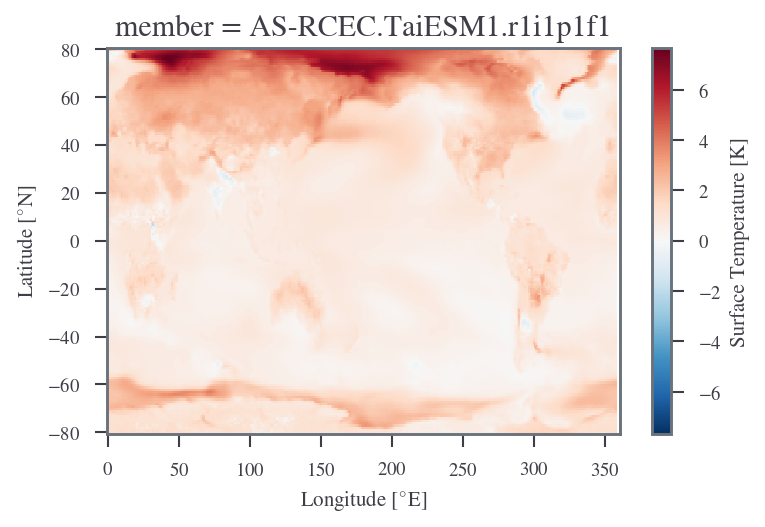

In [81]:
xr.open_dataarray(os.path.join(CMIP6_ENSEMBLE_TRENDS, "ts.nc")).isel(member=0).plot()

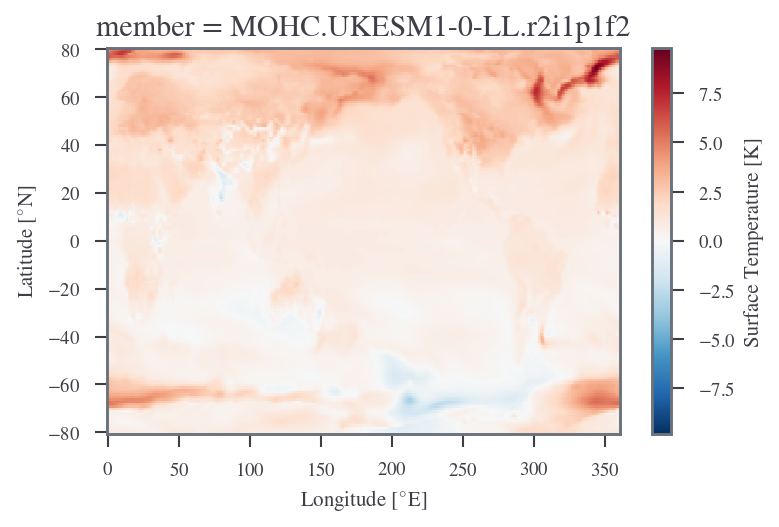

In [82]:
xr.open_dataarray(os.path.join(CMIP6_ENSEMBLE_TRENDS, "ts.nc")).isel(member=30).plot()